# ECG Metadata Management System

## Overiew of Class Architecture

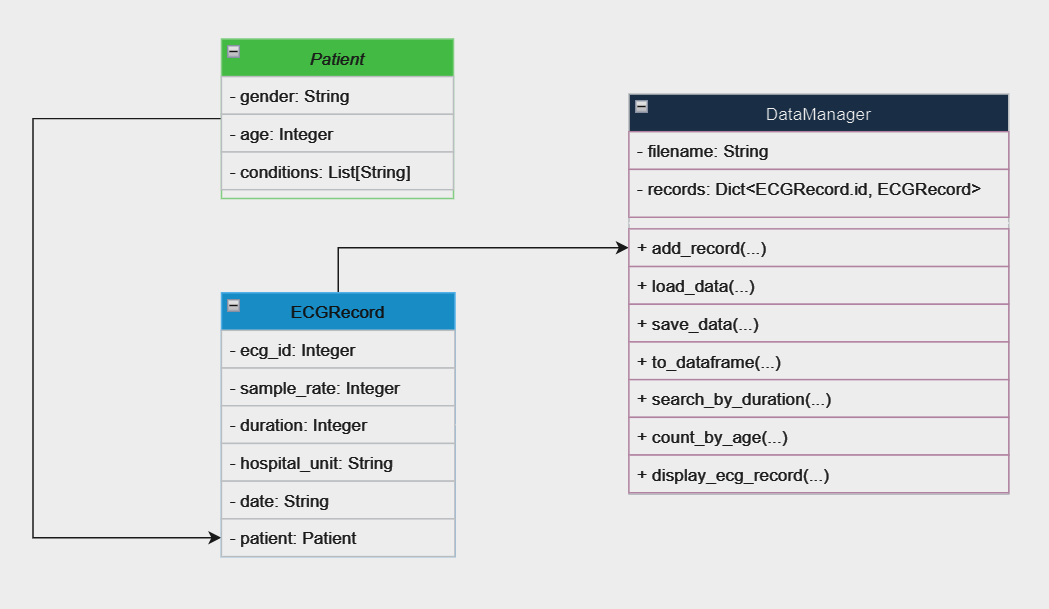

## Patient and ECG Record Classes

- defining two classes, Patient and ECGRecord, for managing patient details and ECG records. The Patient class stores gender, age, and health conditions, while the ECGRecord class captures details like sample rate, duration, and associated patient info, including an optional image path.

In [46]:
import pandas as pd

In [30]:
class Patient:
    def __init__(self, gender, age, conditions):
        self.gender = gender
        self.age = age
        self.conditions = conditions

class ECGRecord:
    def __init__(self, ecg_id, sample_rate, duration, hospital_unit, date, patient, image_path=None):
        self.ecg_id = ecg_id
        self.sample_rate = sample_rate
        self.duration = duration
        self.hospital_unit = hospital_unit
        self.date = date
        self.patient = patient
        self.image_path = image_path

    def __str__(self):
        return f"ECGRecord(ecg_id = {self.ecg_id}, duration={self.duration}, patient_age={self.patient.age})"

## DataManager class for managing, loading, saving, searching, and displaying records

In [31]:
class DataManager:
    def __init__(self, filename):
        # Initialize the DataManager with the path to the CSV file where data is stored.
        self.filename = "../data/" + filename
        self.records = {}  # Initialize a dictionary to hold ECGRecord objects.
        self.load_data()  # Load existing records from the CSV file at initialization.

    def add_record(self, record):
        # Add or update a record in the dictionary with the ECG record's ID as the key.
        self.records[record.ecg_id] = record
        self.save_data()  # Save the updated records to the CSV file.

    def load_data(self):
        # Load data from a CSV file and populate the records dictionary.
        try:
            df = pd.read_csv(self.filename)  # Read data from the CSV file.
            for _, row in df.iterrows():  # Iterate through each row in the DataFrame.
                # Conditionally process 'Health Conditions' to handle various formats.
                if pd.isna(row['Health Conditions']):
                    conditions = []
                elif ',' in row['Health Conditions']:
                    conditions = [condition.strip() for condition in row['Health Conditions'].split(',')]
                else:
                    conditions = [row['Health Conditions'].strip()]
                
                # Create a Patient object from the row data.
                patient = Patient(row['Gender'], int(row['Age']), conditions)
                
                # Create an ECGRecord object and populate it with data from the row.
                record = ECGRecord(int(row['ECG Record']), int(row['Sample Rate']), int(row['Duration']), 
                                   row['Hospital Unit'], row['Date of Recording'], patient, row.get('Heart Image Path'))
                
                # Store the ECGRecord in the dictionary using its ID as the key.
                self.records[int(row['ECG Record'])] = record
        except FileNotFoundError:
            # Handle the case where the CSV file does not exist.
            print("File not found. Starting with an empty list.")

    def save_data(self):
        # Convert the records dictionary to a DataFrame and save it to the CSV file.
        df = self.to_dataframe(self.records.values())
        df.to_csv(self.filename, index=False)

    def to_dataframe(self, records):
        # Convert a collection of ECGRecord objects to a pandas DataFrame.
        data = {
            "ECG Record": [record.ecg_id for record in records],
            "Sample Rate": [record.sample_rate for record in records],
            "Duration": [record.duration for record in records],
            "Hospital Unit": [record.hospital_unit for record in records],
            "Date of Recording": [record.date for record in records],
            "Gender": [record.patient.gender for record in records],
            "Age": [record.patient.age for record in records],
            "Health Conditions": [", ".join(record.patient.conditions) for record in records],
            "Heart Image Path": [record.image_path if hasattr(record, 'image_path') else None for record in records]
        }
        return pd.DataFrame(data)
    
    def search_by_duration(self, min_duration):
        # Return a DataFrame containing records with a duration greater than or equal to min_duration.
        filtered_records = [record for record in self.records.values() if record.duration >= min_duration]
        return self.to_dataframe(filtered_records)

    def count_by_age(self, min_age):
        # Count and return the number of records where the patient's age is greater than or equal to min_age.
        return sum(1 for record in self.records.values() if record.patient.age >= min_age)

    def display_ecg_record(self, ecg_id):
        # Display detailed information for a specific ECG record identified by ecg_id.
        record = self.records.get(ecg_id)
        if record:
            print(f"ECG Record ID: {record.ecg_id}")
            print(f"Sample Rate: {record.sample_rate} Hz")
            print(f"Duration: {record.duration} seconds")
            print(f"Hospital Unit: {record.hospital_unit}")
            print(f"Date of Recording: {record.date}")
            print(f"Patient Age: {record.patient.age}")
            print(f"Patient Gender: {record.patient.gender}")
            print(f"Health Conditions: {', '.join(record.patient.conditions)}")
            print(f"Heart Image Path: {record.image_path if hasattr(record, 'image_path') else 'No image available'}\n")
        else:
            print(f"No record found with ID {ecg_id}")

## Populating ECG Record Database

In [41]:
data_manager = DataManager("ecg_data.csv")

# Adding new records
patient1 = Patient("Female", 34, ["None"])
patient2 = Patient("Male", 21, ["Hypertension", "Diabetes"])


ecg1 = ECGRecord(
    ecg_id=416,
    sample_rate=500,
    duration=8,
    hospital_unit="Cardiology",
    date="2024-01-10",
    patient=patient1,
    image_path="..data/images/422.png"  
)

ecg2 = ECGRecord(
    ecg_id=418,
    sample_rate=500,
    duration=8,
    hospital_unit="Cardiovascular Surgery",
    date="2023-11-21",
    patient=patient2,
    image_path="..data/images/424.png"  
)
data_manager.add_record(ECGRecord(420, 300, 10, "Emergency", "2024-01-15", Patient("Male", 50, ["Atrial Fibrillation"]), "..data/images/416.png"))
data_manager.add_record(ECGRecord(422, 500, 9, "Cardiology", "2024-02-01", Patient("Male", 45, ["Hypertension"]), "..data/images/418.png"))
data_manager.add_record(ECGRecord(424, 400, 15, "Endocrinology", "2023-09-02", Patient("Female", 55, ["Diabetes"]), "..data/images/420.png"))
data_manager.add_record(ECGRecord(426, 400, 16, "Endocrinology", "2023-012-02", Patient("Female", 23, ["Diabetes"]), "..data/images/426.png"))

data_manager.add_record(ecg1)
data_manager.add_record(ecg2)




### Display all records longer than 10 seconds

In [42]:
long_duration_df = data_manager.search_by_duration(10)
print("Long Duration Records DataFrame:")
long_duration_df

Long Duration Records DataFrame:


,ECG Record,Sample Rate,Duration,Hospital Unit,Date of Recording,Gender,Age,Health Conditions,Heart Image Path
0,420,300,10,Emergency,2024-01-15,Male,50,Atrial Fibrillation,..data/images/416.png
1,426,400,16,Endocrinology,2023-012-02,Female,23,Diabetes,..data/images/426.png
2,424,400,15,Endocrinology,2023-09-02,Female,55,Diabetes,..data/images/420.png


### Display count of records for patients older than 50

In [43]:
older_patient_records_count = data_manager.count_by_age(50)
print(f"Records with patient age 50 or older: {older_patient_records_count}")

Records with patient age 50 or older: 2


### Generating DataFrame from All ECG Records

In [44]:
data_manager.to_dataframe(data_manager.records.values())

,ECG Record,Sample Rate,Duration,Hospital Unit,Date of Recording,Gender,Age,Health Conditions,Heart Image Path
0,416,500,8,Cardiology,2024-01-10,Female,34,None,..data/images/422.png
1,418,500,8,Cardiovascular Surgery,2023-11-21,Male,21,"Hypertension, Diabetes",..data/images/424.png
2,420,300,10,Emergency,2024-01-15,Male,50,Atrial Fibrillation,..data/images/416.png
3,426,400,16,Endocrinology,2023-012-02,Female,23,Diabetes,..data/images/426.png
4,422,500,9,Cardiology,2024-02-01,Male,45,Hypertension,..data/images/418.png
5,424,400,15,Endocrinology,2023-09-02,Female,55,Diabetes,..data/images/420.png


In [45]:
data_manager.display_ecg_record(422)

ECG Record ID: 422
Sample Rate: 500 Hz
Duration: 9 seconds
Hospital Unit: Cardiology
Date of Recording: 2024-02-01
Patient Age: 45
Patient Gender: Male
Health Conditions: Hypertension
Heart Image Path: ..data/images/418.png

